c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rifat\miniconda3\envs\mlweb\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rifat\AppData\Local\Temp\ipykernel_35116\340493046.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/

Classification Report:
              precision    recall  f1-score   support

      NORMAL     0.9704    0.7009    0.8139       234
   PNEUMONIA     0.8462    0.9872    0.9112       390

    accuracy                         0.8798       624
   macro avg     0.9083    0.8440    0.8626       624
weighted avg     0.8928    0.8798    0.8747       624



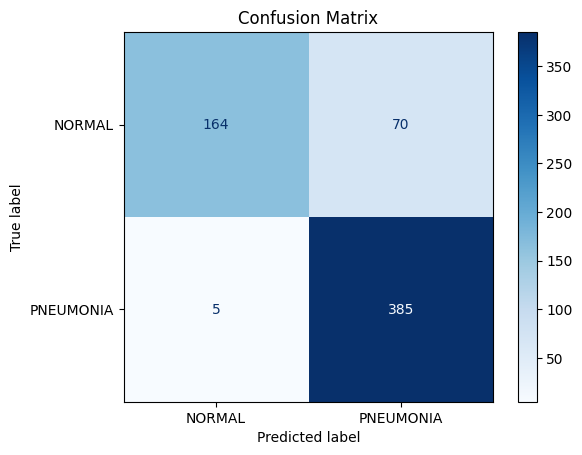

Accuracy: 87.98%


In [8]:
import os
from PIL import Image
import torch
from torchvision import transforms, models
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  
])


# Load the model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Modify for binary classification

# Load the trained model weights
model.load_state_dict(torch.load('model9_5.pt'))
model.eval()

# Define test dataset directories
test_dir = r"D:\Pneumonia-Classification-pytorch\chest_xray\test"
normal_dir = os.path.join(test_dir, "NORMAL")
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

# Initialize variables to store results
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

# Helper function to predict a single image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transformations(image)
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted_label = output.argmax(dim=1).item()
    return predicted_label

# Evaluate NORMAL images
for image_name in os.listdir(normal_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
        image_path = os.path.join(normal_dir, image_name)
        y_true.append(0)  # NORMAL = 0
        y_pred.append(predict_image(image_path))

# Evaluate PNEUMONIA images
for image_name in os.listdir(pneumonia_dir):
    if image_name.lower().endswith(('png', 'jpg', 'jpeg')):
        image_path = os.path.join(pneumonia_dir, image_name)
        y_true.append(1)  # PNEUMONIA = 1
        y_pred.append(predict_image(image_path))

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
report = classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"], digits=4)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Accuracy: {accuracy:.2f}%")
